# 1. Bibliothèques Utilisées + Import CSV



In [90]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv(r'files\revenus.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 2. Traitement des données aberrantes et manquantes

### 2.A. Suppression Colonnes et Données Manquantes

In [92]:
# Suppression des colonnes inutiles
df = df.drop(columns=['fnlwgt'])
df = df.drop(columns=['educational-num'])

In [93]:
# Suppresion des lignes ayant "?" considérés comme des valeurs manquantes
## On compte le nombre de lignes avant manip (n_lignes_pre) puis après la manip (n_ligne_post) pour compter le nombre de lignes affectué par la manipulation
n_lignes_pre = len(df)

df = df.replace('?', np.nan)
df = df.dropna()
df.reset_index(inplace=True, drop=True)

n_lignes_post = len(df)
n_lignes_suppr = n_lignes_pre - n_lignes_post
proportion_suppr = round(n_lignes_suppr / n_lignes_pre * 100,1)

print(f"{n_lignes_suppr} individus ont été supprimées de la bdd, cela représente {proportion_suppr}% de l'échantillon\nIl y a maintenant {n_lignes_post} individus")

3620 individus ont été supprimées de la bdd, cela représente 7.4% de l'échantillon
Il y a maintenant 45222 individus


### 2.B Données Aberrantes

In [94]:
# Suppression des valeurs 99999 dans capital-gain
valeurs_aberrantes = df[df['capital-gain'] == 99999].index
df = df.drop(valeurs_aberrantes)

count_99999 = (df['capital-gain'] == 99999).sum()



# 3. Graphiques données sans regroupement

### 3.A. Stats univariés

#### Piechart Quali

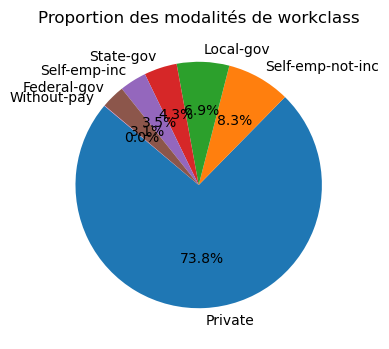

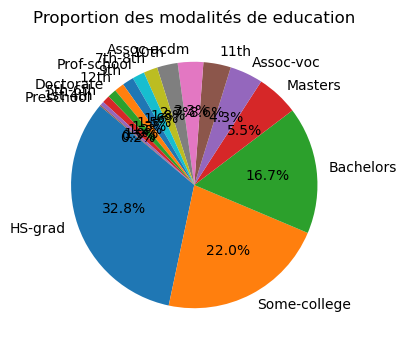

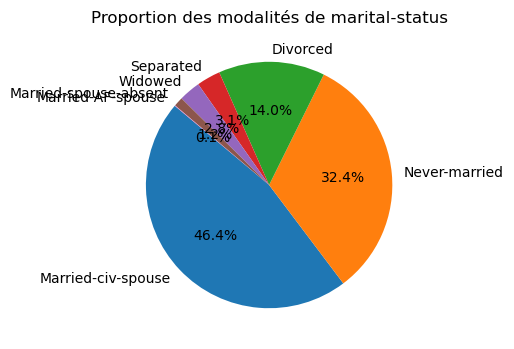

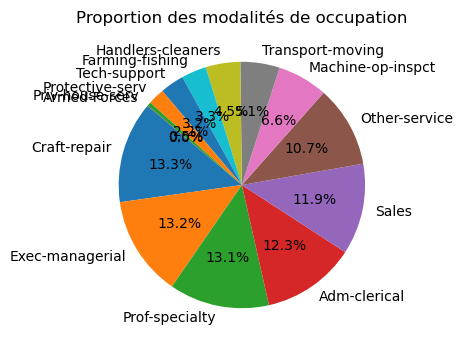

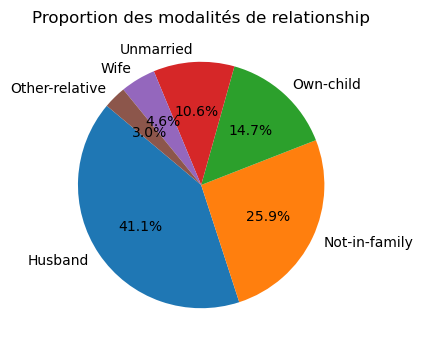

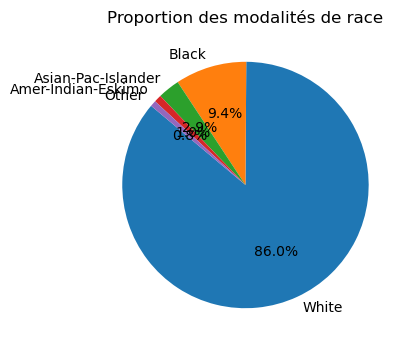

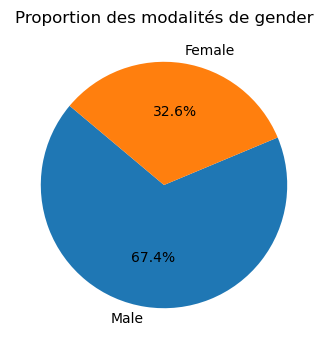

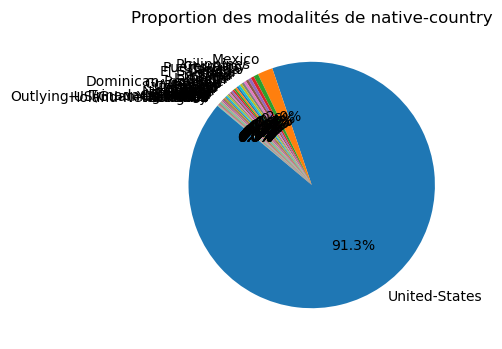

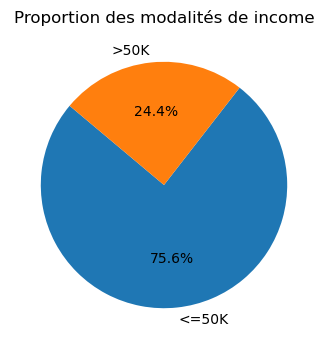

In [95]:
# Boucle qui itere le processus de création d'un piechart pour chaque variable qualitative
variables_quali = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']
for col in variables_quali:
    prop_mod = df[col].value_counts()
    
    plt.figure(figsize=(4, 4))
    plt.pie(prop_mod, labels=prop_mod.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Proportion des modalités de {col}")
    plt.show()

#### Graph Quanti

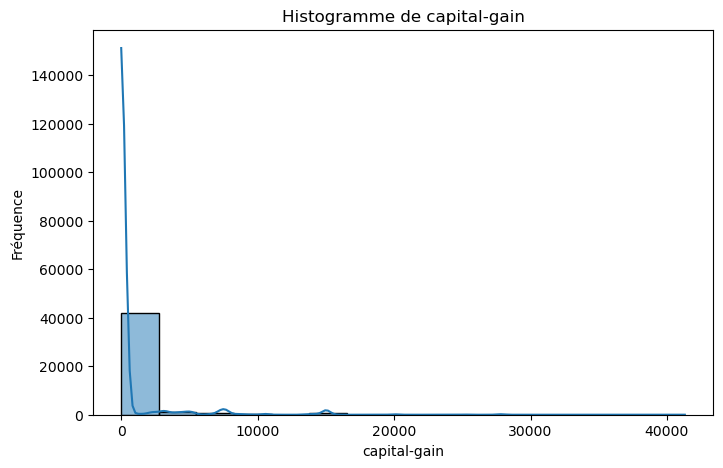

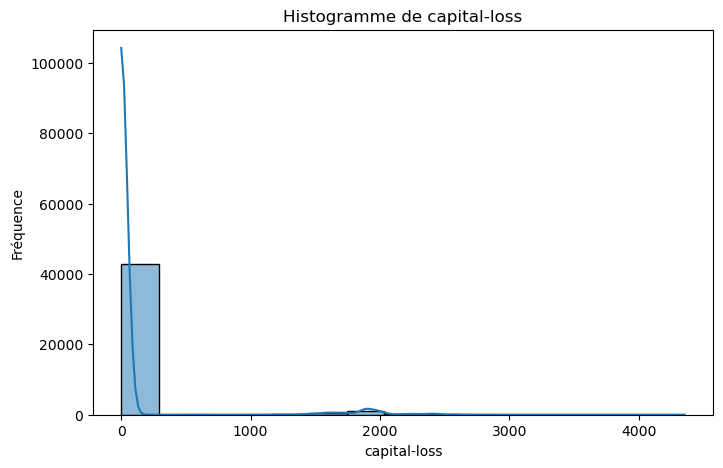

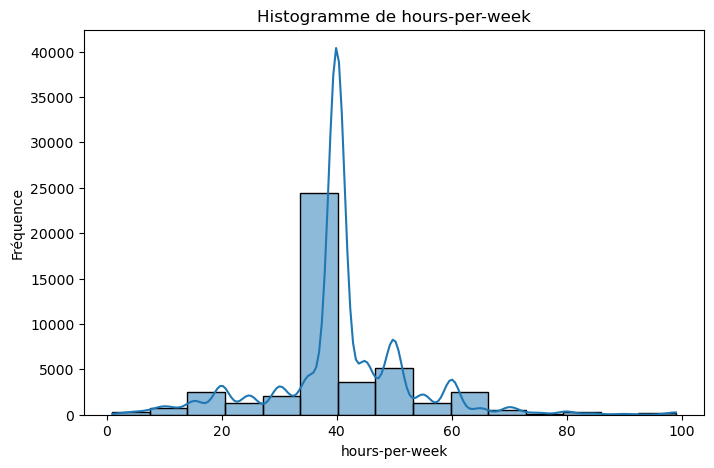

In [96]:
# Boucle qui itere le processus de création d'histogramme suivant pour chaque variable quantitatives
variables_histo = ['capital-gain', 'capital-loss', 'hours-per-week']
for variable in variables_histo:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[variable], kde=True, bins=15)
    plt.title(f'Histogramme de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Fréquence')
    plt.show()

C:\Users\theol\AppData\Local\Temp\ipykernel_15296\849426555.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable], shade=True)  # shade=True pour colorier sous la courbe


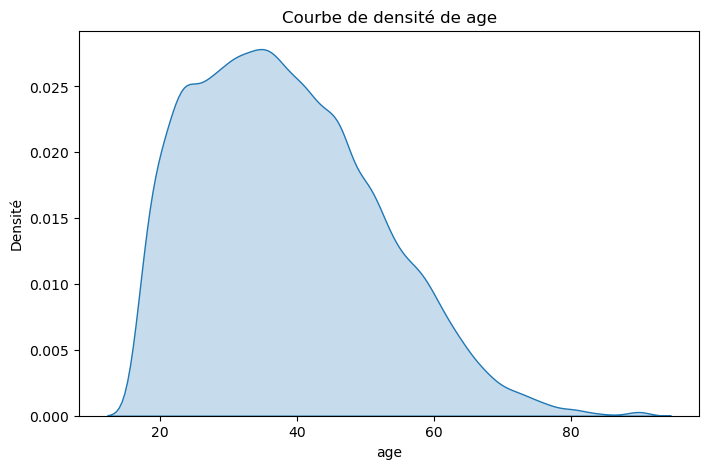

C:\Users\theol\AppData\Local\Temp\ipykernel_15296\849426555.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[variable], shade=True)  # shade=True pour colorier sous la courbe


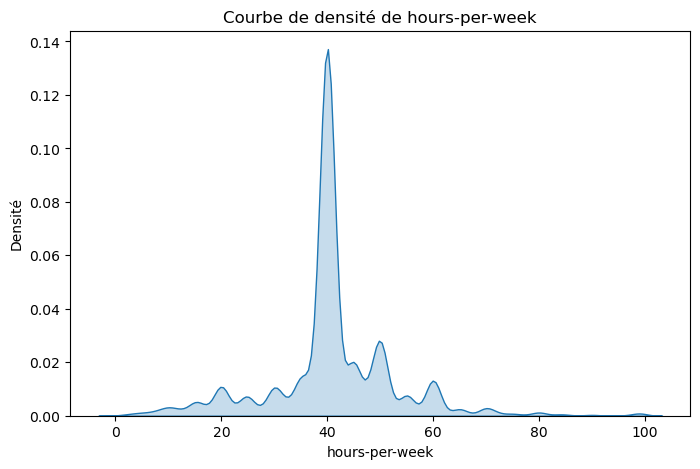

In [97]:
variable_courbe_dens = ['age','hours-per-week']

for variable in variable_courbe_dens:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(df[variable], shade=True)  # shade=True pour colorier sous la courbe
    plt.title(f'Courbe de densité de {variable}')
    plt.xlabel(variable)
    plt.ylabel('Densité')
    plt.show()

#### Boxplot Quanti

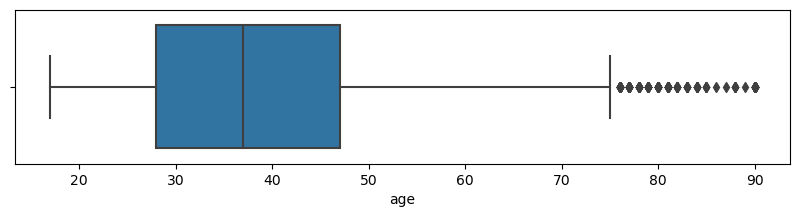

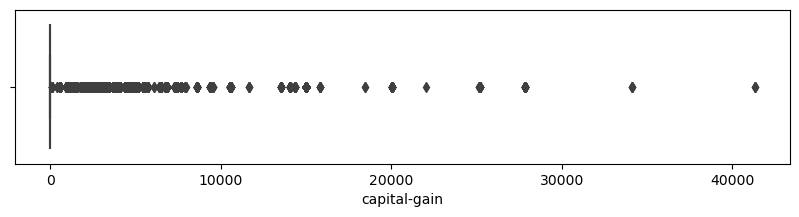

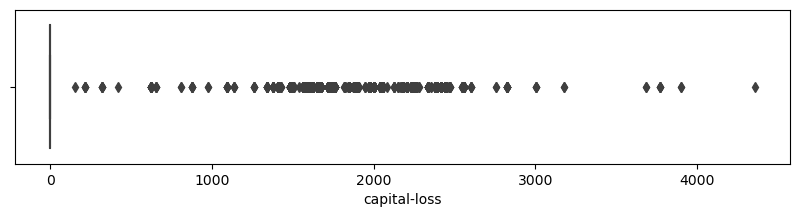

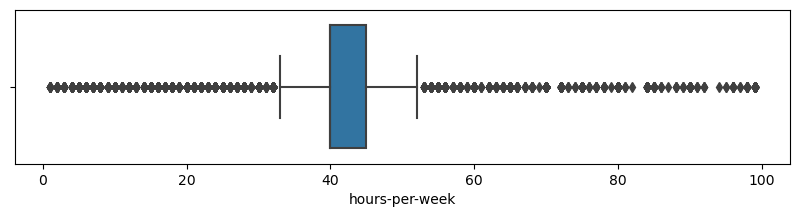

In [98]:
variables_quanti = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

for variable in variables_quanti:
    plt.figure(figsize=(10, 2))
    sns.boxplot(x=df[variable])
    plt.xlabel(variable)
    plt.show()

### 3.B. Stats bi-variés

#### H-Bars Quanti 

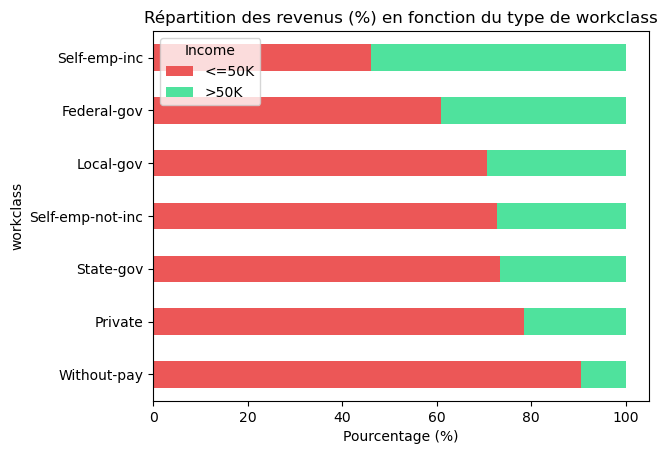

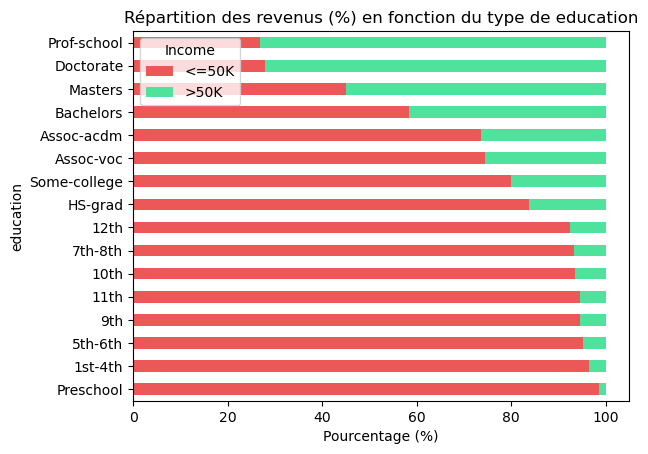

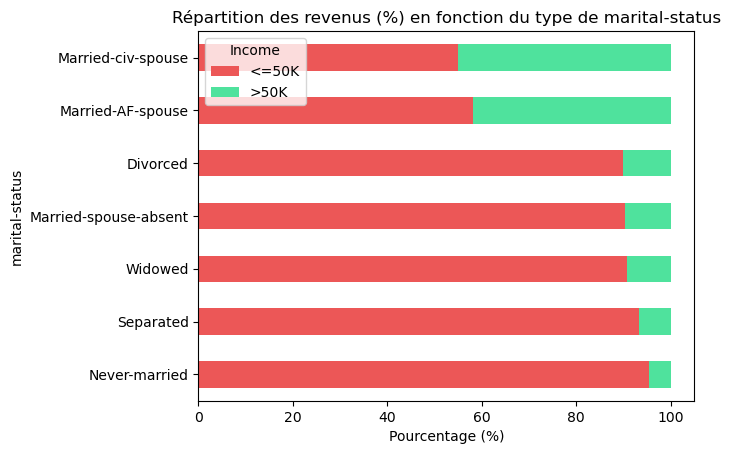

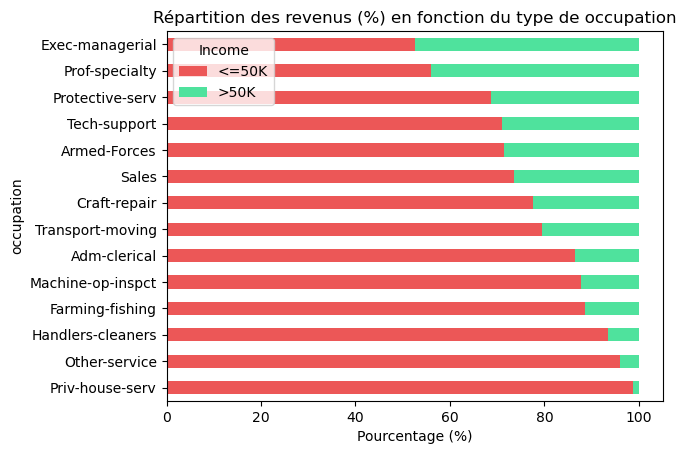

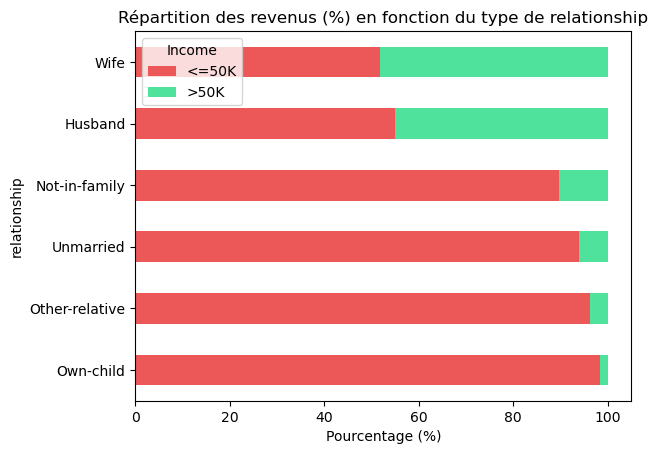

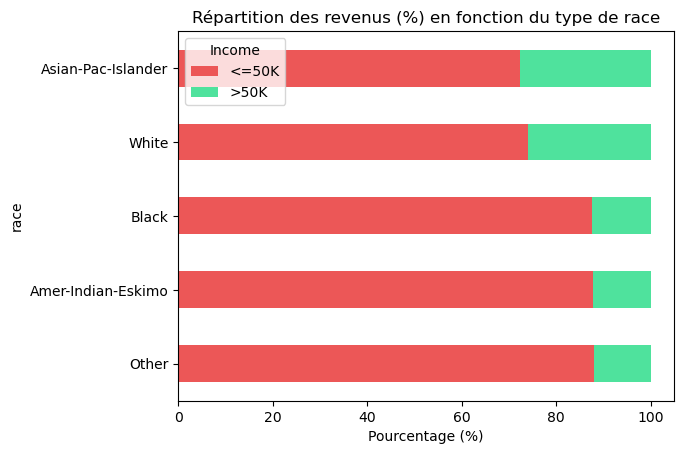

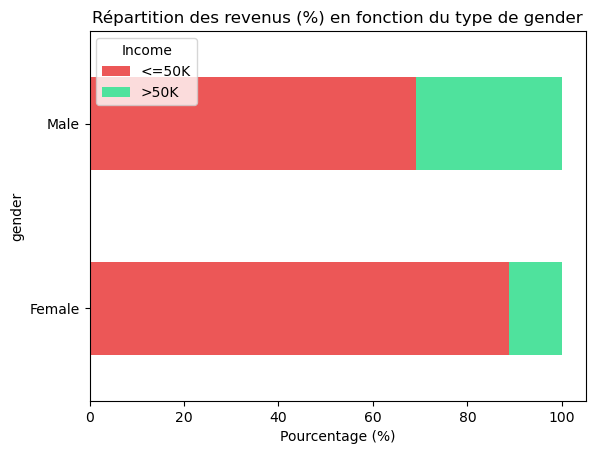

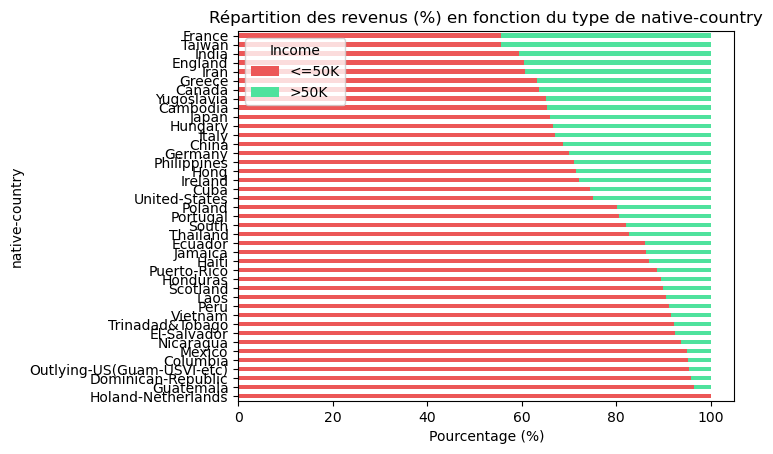

In [99]:
# Calcule les pourcentages pour chaque combination workclass et income
variables_quali2 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for variable in variables_quali2 :
    grouped = df.groupby([variable, 'income']).size().unstack()
    percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

    # Tri de l'affichage des modalités en fonction du pourcentage de la classe '<=50K'
    percentages['sort'] = percentages['<=50K']
    percentages = percentages.sort_values(by='sort', ascending=False).drop(columns='sort')

    # Diagramme en barres avec pourcentages
    ax = percentages.plot(kind='barh', stacked=True, color=['#ec5757', '#4fe29d'])
    plt.title('Répartition des revenus (%) en fonction du type de '+ variable )
    plt.ylabel(variable)
    plt.xlabel('Pourcentage (%)')
    plt.legend(title='Income', loc='upper left')
    plt.show()

# 4. Regroupement des modalités

### 4.A. Procedure de Regroupement

In [103]:
df_test = df.copy()

# Regroupement des personnes d'ethnies autre que blanc et noir en "Other_race"
df_test['race'] = df_test['race'].replace(
    {'Asian-Pac-Islander|Amer-Indian-Eskimo|Other': 'Other_race'}, regex=True)

# Regroupement des personnes d'origines différentes en une cartégorie "Other"
df_test['native-country'] = df_test['native-country'].replace(
    {'^(?!United-States$|Mexico$).+': 'Other_country'}, regex=True)

# Regroupement des personnes mariés mais avec un conjoint dans l'armé avec les personnes mariés mais avec un conjoint absent pour diverse raisons
df_test['marital-status'] = df_test['marital-status'].replace(
    {'Married-AF-spouse|Divorced|Widowed|Separated|Married-spouse-absent': 'Alone'}, regex = True)

df_test['education'] = df_test['education'].replace(
    {'Preschool|1st-4th|5th-6th|7th-8th': 'Low_education', '9th|10th|11th|12th': 'Secondary-unfinished'}, regex=True)

df_test['workclass'] = df_test['workclass'].replace(
    {'Local-gov|State-gov': 'State-Local-gov'}, regex=True)

### 4.B. Graphiques avec regroupement

##### Stats univariés 

PieChart Quali

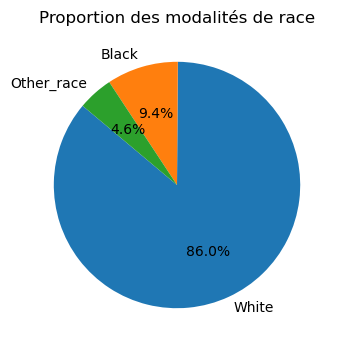

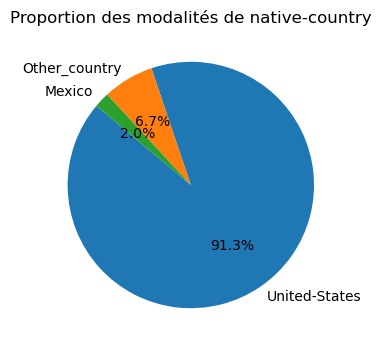

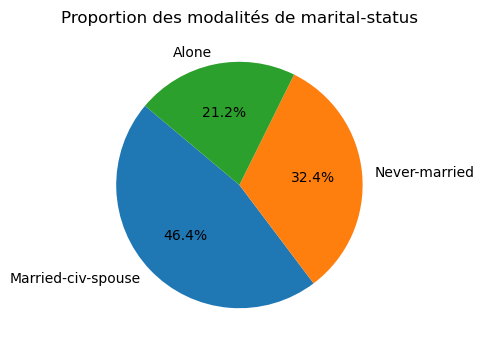

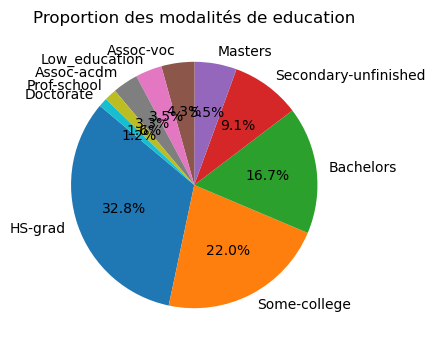

In [104]:
#variables_quali = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']
variables_quali_regroupement = ['race','native-country','marital-status','education']


# Boucle qui itere le processus suivant pour chaque variable qualitative
for col in variables_quali_regroupement:

    # Calcule les proportions des différentes modalités
    prop_mod = df_test[col].value_counts()

    # Crée un pie chart grace a mathplotlib
    plt.figure(figsize=(4, 4))
    plt.pie(prop_mod, labels=prop_mod.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Proportion des modalités de {col}")
    sns.color_palette("tab10")
    plt.show()

##### Stats bivariés

H-Bars Quali

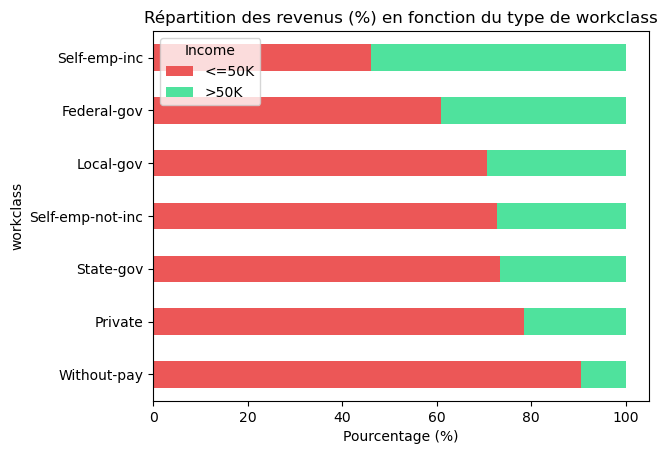

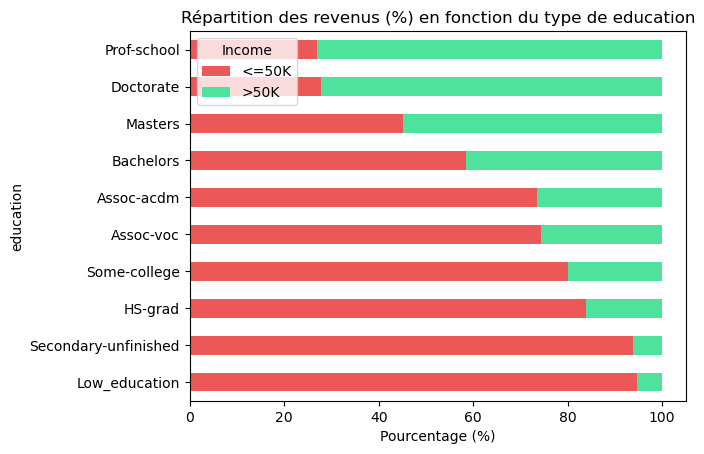

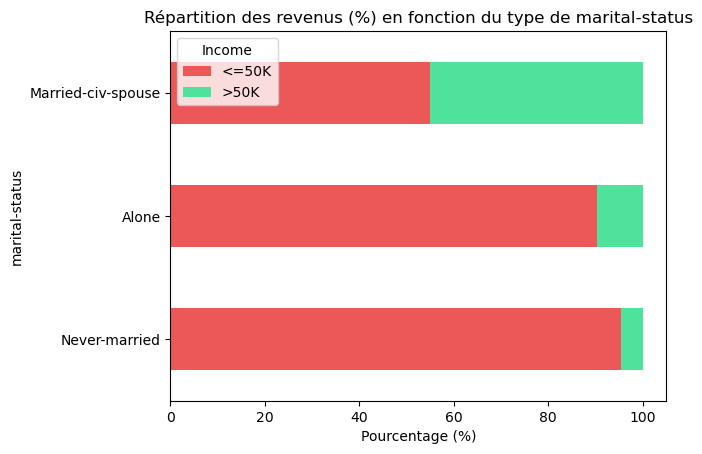

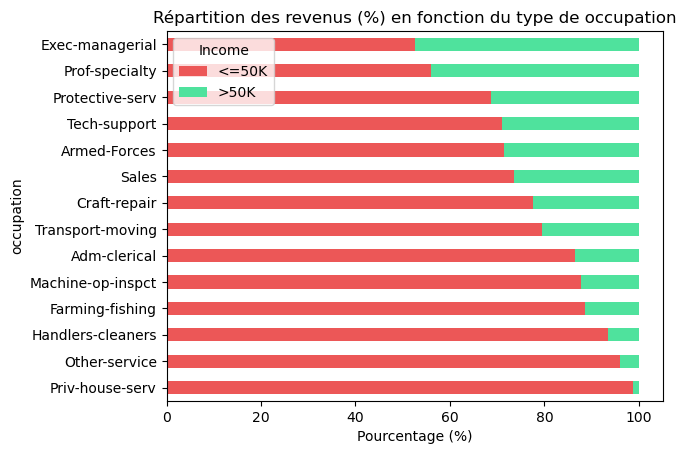

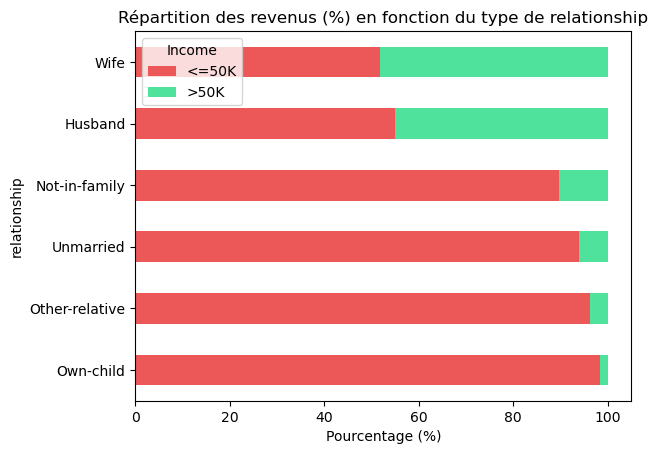

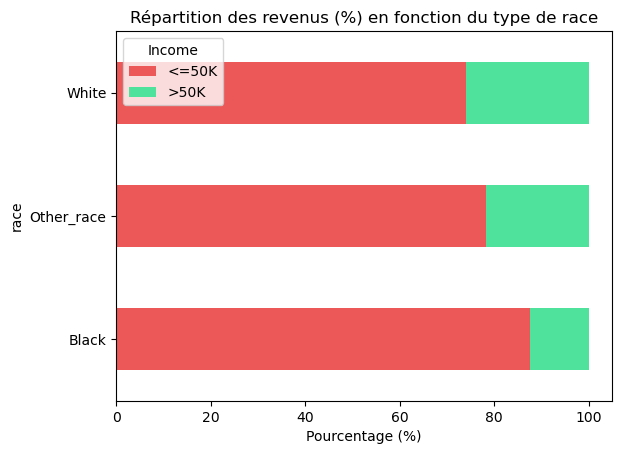

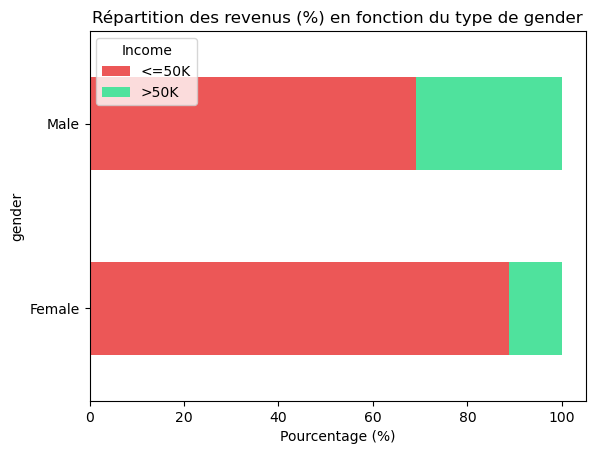

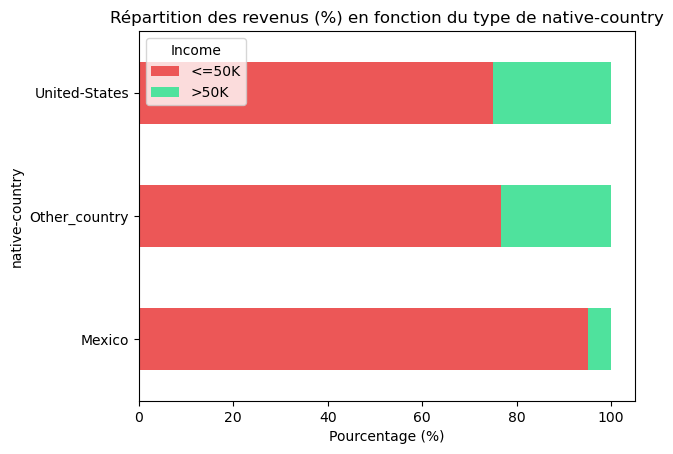

In [105]:
# Calcule les pourcentages pour chaque combination workclass et income
variables_quali2 = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

for variable in variables_quali2 :
    grouped = df_test.groupby([variable, 'income']).size().unstack()
    percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

    # Tri de l'affichage des modalités en fonction du pourcentage de la classe '<=50K'
    percentages['sort'] = percentages['<=50K']
    percentages = percentages.sort_values(by='sort', ascending=False).drop(columns='sort')

    # Diagramme en barres avec pourcentages
    ax = percentages.plot(kind='barh', stacked=True, color=['#ec5757', '#4fe29d'])
    plt.title('Répartition des revenus (%) en fonction du type de '+ variable )
    plt.ylabel(variable)
    plt.xlabel('Pourcentage (%)')
    plt.legend(title='Income', loc='upper left')
    plt.show()